# VnV 

- JPark


## 1. Config

In [1]:
# Test images

zip_images_url = 'http://keticmr.iptime.org:22080/edgeai/images/imagenet-mini-val.zip'
zip_images = 'imagenet-mini-val.zip'
dataset_root = './dataset'
fpath_zip_images = dataset_root + '/' + zip_images
fpath_testimages = dataset_root + '/imagenet-mini-val/'

# Models
#names = ['res18_weights.pth', 'res34_weights.pth', 'res50_weights.pth', 'res101_weights.pth', 'res152_weights.pth']
names = ['resnet18-dict.pth', 'resnet34-dict.pth', 'resnet50-dict.pth', 'resnet101-dict.pth', 'resnet152-dict.pth']
urlroot = 'http://keticmr.iptime.org:22080/edgeai/models_jpark/'
modeldir = './checkpoint/'

urlmodels = []
for name in names:
    urlmodels.append( urlroot + name )


In [2]:
fpath_zip_images

'./dataset/imagenet-mini-val.zip'

In [3]:
fpath_testimages

'./dataset/imagenet-mini-val/'

In [4]:
urlmodels

['http://keticmr.iptime.org:22080/edgeai/models_jpark/resnet18-dict.pth',
 'http://keticmr.iptime.org:22080/edgeai/models_jpark/resnet34-dict.pth',
 'http://keticmr.iptime.org:22080/edgeai/models_jpark/resnet50-dict.pth',
 'http://keticmr.iptime.org:22080/edgeai/models_jpark/resnet101-dict.pth',
 'http://keticmr.iptime.org:22080/edgeai/models_jpark/resnet152-dict.pth']

## 2. import

In [5]:
import torch

## 3. download data

In [227]:
import os

# make download directory
def makedir(path): 
    try: 
        os.makedirs(path)
    except OSError: 
        if not os.path.isdir(path): 
            raise
    return os.path.abspath(path)

# Download images
import urllib, os

d = makedir(dataset_root) # 저장 공간 생성
url, fname = (zip_images_url, fpath_zip_images)
try: 
    urllib.URLopener().retrieve(url, fname)
except: 
    urllib.request.urlretrieve(url, fname)


In [228]:

# Unzip
cmd = 'unzip ' + fpath_zip_images + ' -d ' + dataset_root
print(cmd)
os.system(cmd)

unzip ./dataset/imagenet-mini-val.zip -d ./dataset
Archive:  ./dataset/imagenet-mini-val.zip


replace ./dataset/__MACOSX/._imagenet-mini-val? [y]es, [n]o, [A]ll, [N]one, [r]ename:  NULL
(EOF or read error, treating as "[N]one" ...)


256

## 4. Load model

In [229]:
# download models
makedir(modeldir)

for name in names:
    torch.hub.download_url_to_file(urlroot+name, modeldir+name)
    

In [6]:

model_fpaths = []
for name in names:
    model_fpaths.append(modeldir + name)

model_fpaths
#print(model_fpaths)
#print(urlroot+name)
#print(modeldir+name)

['./checkpoint/resnet18-dict.pth',
 './checkpoint/resnet34-dict.pth',
 './checkpoint/resnet50-dict.pth',
 './checkpoint/resnet101-dict.pth',
 './checkpoint/resnet152-dict.pth']

In [7]:
# initial models

model_names = ['resnet18', 'resnet34', 'resnet50', 'resnet101', 'resnet152']
models = []

for model_name in model_names:
    m = torch.hub.load('pytorch/vision:v0.10.0', model_name, pretrained=False)
    models.append(m)
    m.eval()

Using cache found in /home/jpark/.cache/torch/hub/pytorch_vision_v0.10.0
Using cache found in /home/jpark/.cache/torch/hub/pytorch_vision_v0.10.0
Using cache found in /home/jpark/.cache/torch/hub/pytorch_vision_v0.10.0
Using cache found in /home/jpark/.cache/torch/hub/pytorch_vision_v0.10.0
Using cache found in /home/jpark/.cache/torch/hub/pytorch_vision_v0.10.0


In [8]:
len(models)

5

In [9]:
# load saved weigts to the initial model
for idx, model in enumerate(models):
    checkpoint = urlmodels[idx]
    model.load_state_dict(torch.hub.load_state_dict_from_url(checkpoint, progress=False))
    model.eval()
    print(idx)
    
    

0
1
2
3
4


## Test data

In [10]:
fpath_testimages

'./dataset/imagenet-mini-val/'

In [11]:
import os
dirs = os.listdir(fpath_testimages)
len(dirs[:])

1000

In [12]:
from glob import iglob

'''
# read test files
testfiles = []
for fname in sorted( iglob(fpath_testimages + '**/*.JPEG', recursive=True) ):
    testfiles.append(fname)
'''

idx_gt = []
idx = 0
testfiles = []
for d in sorted( iglob(fpath_testimages + 'n*', recursive=False) ):
    for fname in sorted( iglob(d + '/*.JPEG', recursive=True) ):
        testfiles.append(fname)
        idx_gt.append( idx )
    idx += 1


In [13]:
len(idx_gt)

3923

In [14]:
len(testfiles)

3923

In [15]:
testfiles[:2]

['./dataset/imagenet-mini-val/n01440764/ILSVRC2012_val_00009111.JPEG',
 './dataset/imagenet-mini-val/n01440764/ILSVRC2012_val_00030740.JPEG']

In [16]:

# Read the categories
with open("imagenet_classes.txt", "r") as f:
    categories = [s.strip() for s in f.readlines()]



In [17]:
len(categories)

1000

In [18]:
categories[0:10]

['tench',
 'goldfish',
 'great white shark',
 'tiger shark',
 'hammerhead',
 'electric ray',
 'stingray',
 'cock',
 'hen',
 'ostrich']

In [21]:
# sample execution (requires torchvision)
from PIL import Image
from torchvision import transforms
import time
from tqdm import tqdm

start = time.time()

'''
preprocess = transforms.Compose([
        transforms.Resize(256),
        transforms.CenterCrop(224),
        transforms.ToTensor(),
        transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
])
'''

# Define transforms for the evaluation phase
preprocess = transforms.Compose([transforms.Resize(256),
                                      transforms.CenterCrop(224),
                                      transforms.ToTensor(),
                                      transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
                                ])

model = models[0]

top1_cnt = 0
top5_cnt = 0

testset = testfiles[:]
n = len(testset)
idx = 0
for fpath in tqdm( testset ):
    #print( fpath )
    input_image = Image.open(fpath)

    try:
        input_tensor = preprocess(input_image)
    except:
        input_image = Image.open(testset[0])
        input_tensor = preprocess(input_image)
    input_batch = input_tensor.unsqueeze(0) # create a mini-batch as expected by the model

    # move the input and model to GPU for speed if available
    if torch.cuda.is_available():
        input_batch = input_batch.to('cuda')
        model.to('cuda')

    with torch.no_grad():
        output = model(input_batch)
        
    # Tensor of shape 1000, with confidence scores over Imagenet's 1000 classes
    #print(output[0])
    
    # The output has unnormalized scores. To get probabilities, you can run a softmax on it.
    probabilities = torch.nn.functional.softmax(output[0], dim=0)
    #print(probabilities)

    
    # Show top categories per image
    top5_prob, top5_catid = torch.topk(probabilities, 5)
    for i in range(top5_prob.size(0)):
        #print(top5_catid[i])
        #pass
        #print(categories[top5_catid[i]], top5_prob[i].item())
        
        if( top5_catid[i] == idx_gt[idx] ):
            top1_cnt += 1
        
    #print('')
    idx += 1

end = time.time()
print('n = ', n)
print('top1_cnt = ', top1_cnt)
print('top1_cnt/n = ', top1_cnt/n)
print('time = ', end - start)

100%|██████████| 3923/3923 [00:37<00:00, 103.60it/s]

n =  3923
top1_cnt =  3299
top1_cnt/n =  0.8409380576089728
time =  37.87246131896973


In [ ]:
n =  3923
top1_cnt =  3519
top1_cnt/n =  0.8970175885801682
time =  99.26183104515076

In [ ]:
n =  3923
top1_cnt =  3299
top1_cnt/n =  0.8409380576089728
time =  37.87246131896973

## 3. Load data for inference

In [3]:
test_preprocess = torchvision.transforms.Compose([
    transforms.Resize(256),
    transforms.CenterCrop(224),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
])

batch_size = 1

cifar10_test = torchvision.datasets.CIFAR10('./dataset',
                                            train=False,
                                            download=True,
                                            transform=test_preprocess)
test_loader = DataLoader(cifar10_test, batch_size=batch_size, shuffle=False)

classes = ['plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

Files already downloaded and verified


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


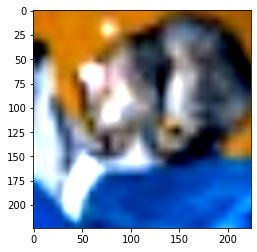

cat  


In [4]:
# 이미지를 보여주기 위한 함수

def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()

# 학습용 이미지를 무작위로 가져오기
dataiter = iter(test_loader)
images, labels = dataiter.next()

# 이미지 보여주기
imshow(torchvision.utils.make_grid(images, 10))
# 정답(label) 출력
print(' '.join(f'{classes[labels[j]]:5s}' for j in range(batch_size)))

## Model load

### Load initial model from hub

In [4]:
!pip list | grep torch

pytorch-lightning                 1.2.1
torch                             1.12.1
torchaudio                        0.12.1+cu113
torchmetrics                      0.7.3
torchvision                       0.13.1


In [5]:
## initial models
res18 = torch.hub.load('pytorch/vision:v0.10.0',
                       'resnet18', pretrained=False)
res34 = torch.hub.load('pytorch/vision:v0.10.0',
                       'resnet34', pretrained=False)
res50 = torch.hub.load('pytorch/vision:v0.10.0',
                       'resnet50', pretrained=False)
res101 = torch.hub.load('pytorch/vision:v0.10.0',
                        'resnet101', pretrained=False)
res152 = torch.hub.load('pytorch/vision:v0.10.0',
                        'resnet152', pretrained=False)

Using cache found in /home/jpark/.cache/torch/hub/pytorch_vision_v0.10.0
/home/jpark/.local/lib/python3.8/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and will be removed in 0.15, please use 'weights' instead.
  warnings.warn(
/home/jpark/.local/lib/python3.8/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and will be removed in 0.15. The current behavior is equivalent to passing `weights=None`.
  warnings.warn(msg)
Using cache found in /home/jpark/.cache/torch/hub/pytorch_vision_v0.10.0
Using cache found in /home/jpark/.cache/torch/hub/pytorch_vision_v0.10.0
Using cache found in /home/jpark/.cache/torch/hub/pytorch_vision_v0.10.0
Using cache found in /home/jpark/.cache/torch/hub/pytorch_vision_v0.10.0


## download model

In [7]:

names = ['res18_weights.pth', 'res34_weights.pth', 'res50_weights.pth', 'res101_weights.pth', 'res152_weights.pth']
urlroot = 'http://keticmr.iptime.org:22080/edgeai/vnv_models/resnet/'
localdir = './checkpoint/'


In [8]:

paths = []
for name in names:
    paths.append( localdir+name )
    
paths


for name in names:
    torch.hub.download_url_to_file(urlroot+name, localdir+name)
    



['./checkpoint/res18_weights.pth',
 './checkpoint/res34_weights.pth',
 './checkpoint/res50_weights.pth',
 './checkpoint/res101_weights.pth',
 './checkpoint/res152_weights.pth']

### Load saved weights to the model
별도 선언해준 구조까지 모두 적용 후 저장된 가중치 파일을 적용<br>
<br>
**ResNet18**

In [9]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

model_ft = res18
num_ftrs = model_ft.fc.in_features
# Here the size of each output sample is set to 2.
# Alternatively, it can be generalized to nn.Linear(num_ftrs, len(class_names)).
model_ft.fc = nn.Linear(num_ftrs, len(classes))


In [10]:

## load saved weigts to the initial model
path = paths[0]
saved_weights = torch.load(path)
model_ft.load_state_dict(saved_weights)

res18_ft = model_ft.to(device)

**ResNet34**

In [11]:
model_ft = res34
num_ftrs = model_ft.fc.in_features
# Here the size of each output sample is set to 2.
# Alternatively, it can be generalized to nn.Linear(num_ftrs, len(class_names)).
model_ft.fc = nn.Linear(num_ftrs, len(classes))

## load saved weigts to the initial model
path = paths[1]
saved_weights = torch.load(path)
model_ft.load_state_dict(saved_weights)

res34_ft = model_ft.to(device)

**ResNet50**

In [12]:
model_ft = res50
num_ftrs = model_ft.fc.in_features
# Here the size of each output sample is set to 2.
# Alternatively, it can be generalized to nn.Linear(num_ftrs, len(class_names)).
model_ft.fc = nn.Linear(num_ftrs, len(classes))

## load saved weigts to the initial model
path = paths[2]
saved_weights = torch.load(path)
model_ft.load_state_dict(saved_weights)

res50_ft = model_ft.to(device)

**ResNet101**

In [13]:
model_ft = res101
num_ftrs = model_ft.fc.in_features
# Here the size of each output sample is set to 2.
# Alternatively, it can be generalized to nn.Linear(num_ftrs, len(class_names)).
model_ft.fc = nn.Linear(num_ftrs, len(classes))

## load saved weigts to the initial model
path = paths[3]
saved_weights = torch.load(path)
model_ft.load_state_dict(saved_weights)

res101_ft = model_ft.to(device)

**ResNet152**

In [14]:
model_ft = res152
num_ftrs = model_ft.fc.in_features
# Here the size of each output sample is set to 2.
# Alternatively, it can be generalized to nn.Linear(num_ftrs, len(class_names)).
model_ft.fc = nn.Linear(num_ftrs, len(classes))

## load saved weigts to the initial model
path = paths[4]
saved_weights = torch.load(path)
model_ft.load_state_dict(saved_weights)

res152_ft = model_ft.to(device)

## Inference
불러온 가중치로 업데이트된 모델들에 대한 추론 시간 비교<br>

### ResNet18
#### GPU : RTX 3080 ti (w01 node)

In [16]:
# gpu set
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# Test the model
if torch.cuda.is_available():
    res18_ft.to('cuda')

with torch.no_grad():
    start = time.time()
    correct = 0
    total = 0
    for data in tqdm(test_loader, mininterval=0.01):
        images, labels = data
        images = images.to(device)
        labels = labels.to(device)
        outputs = res18_ft(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()
        
    print("모델명 : model_res18")
    print('Accuracy of the model on the test images: {} %'.format(100 * correct / total))
    print("소요시간 : ", time.time() - start)

100%|██████████| 10000/10000 [00:44<00:00, 223.00it/s]

모델명 : model_res18
Accuracy of the model on the test images: 10.0 %
소요시간 :  44.8457465171814


#### CPU (w01 node)

In [36]:
# gpu set
device = torch.device('cpu')

# Test the model
if torch.cuda.is_available():
    res18_ft.to('cpu')

with torch.no_grad():
    start = time.time()
    correct = 0
    total = 0
    for data in tqdm(test_loader, mininterval=0.01):
        images, labels = data
        images = images.to(device)
        labels = labels.to(device)
        outputs = res18_ft(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()
        
    print("모델명 : model_res18")
    print('Accuracy of the model on the test images: {} %'.format(100 * correct / total))
    print("소요시간 : ", time.time() - start)

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 313/313 [01:11<00:00,  4.38it/s]

모델명 : model_res18
Accuracy of the model on the test images: 91.04 %
소요시간 :  71.54424023628235


### ResNet34
#### GPU

In [12]:
# gpu set
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# Test the model
if torch.cuda.is_available():
    res34_ft.to('cuda')

with torch.no_grad():
    start = time.time()
    correct = 0
    total = 0
    for data in tqdm(test_loader, mininterval=0.01):
        images, labels = data
        images = images.to(device)
        labels = labels.to(device)
        outputs = res34_ft(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()
        
    print("모델명 : model_res34")
    print('Accuracy of the model on the test images: {} %'.format(100 * correct / total))
    print("소요시간 : ", time.time() - start)

100%|█████████████████████████████████████████████████| 313/313 [00:17<00:00, 18.26it/s]

모델명 : model_res34
Accuracy of the model on the test images: 92.84 %
소요시간 :  17.141077518463135


#### CPU

In [13]:
# gpu set
device = torch.device('cpu')

# Test the model
if torch.cuda.is_available():
    res34_ft.to('cpu')

with torch.no_grad():
    start = time.time()
    correct = 0
    total = 0
    for data in tqdm(test_loader, mininterval=0.01):
        images, labels = data
        images = images.to(device)
        labels = labels.to(device)
        outputs = res34_ft(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()
        
    print("모델명 : model_res34")
    print('Accuracy of the model on the test images: {} %'.format(100 * correct / total))
    print("소요시간 : ", time.time() - start)

100%|█████████████████████████████████████████████████| 313/313 [04:40<00:00,  1.12it/s]

모델명 : model_res34
Accuracy of the model on the test images: 92.84 %
소요시간 :  280.5474326610565


### ResNet50
#### GPU

In [14]:
# gpu set
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# Test the model
if torch.cuda.is_available():
    res50_ft.to('cuda')

with torch.no_grad():
    start = time.time()
    correct = 0
    total = 0
    for data in tqdm(test_loader, mininterval=0.01):
        images, labels = data
        images = images.to(device)
        labels = labels.to(device)
        outputs = res50_ft(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()
        
    print("모델명 : model_res50")
    print('Accuracy of the model on the test images: {} %'.format(100 * correct / total))
    print("소요시간 : ", time.time() - start)

100%|█████████████████████████████████████████████████| 313/313 [00:19<00:00, 15.65it/s]

모델명 : model_res50
Accuracy of the model on the test images: 93.37 %
소요시간 :  19.997405767440796


#### CPU

In [15]:
# gpu set
device = torch.device('cpu')

# Test the model
if torch.cuda.is_available():
    res50_ft.to('cpu')

with torch.no_grad():
    start = time.time()
    correct = 0
    total = 0
    for data in tqdm(test_loader, mininterval=0.01):
        images, labels = data
        images = images.to(device)
        labels = labels.to(device)
        outputs = res50_ft(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()
        
    print("모델명 : model_res50")
    print('Accuracy of the model on the test images: {} %'.format(100 * correct / total))
    print("소요시간 : ", time.time() - start)

100%|█████████████████████████████████████████████████| 313/313 [08:43<00:00,  1.67s/it]

모델명 : model_res50
Accuracy of the model on the test images: 93.37 %
소요시간 :  523.9516932964325


### ResNet101
#### GPU

In [16]:
# gpu set
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# Test the model
if torch.cuda.is_available():
    res101_ft.to('cuda')

with torch.no_grad():
    start = time.time()
    correct = 0
    total = 0
    for data in tqdm(test_loader, mininterval=0.01):
        images, labels = data
        images = images.to(device)
        labels = labels.to(device)
        outputs = res101_ft(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()
        
    print("모델명 : model_res101")
    print('Accuracy of the model on the test images: {} %'.format(100 * correct / total))
    print("소요시간 : ", time.time() - start)

100%|█████████████████████████████████████████████████| 313/313 [00:25<00:00, 12.10it/s]

모델명 : model_res101
Accuracy of the model on the test images: 94.4 %
소요시간 :  25.875438451766968


#### CPU

In [17]:
# gpu set
device = torch.device('cpu')

# Test the model
if torch.cuda.is_available():
    res101_ft.to('cpu')

with torch.no_grad():
    start = time.time()
    correct = 0
    total = 0
    for data in tqdm(test_loader, mininterval=0.01):
        images, labels = data
        images = images.to(device)
        labels = labels.to(device)
        outputs = res101_ft(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()
        
    print("모델명 : model_res101")
    print('Accuracy of the model on the test images: {} %'.format(100 * correct / total))
    print("소요시간 : ", time.time() - start)

100%|█████████████████████████████████████████████████| 313/313 [13:25<00:00,  2.57s/it]

모델명 : model_res101
Accuracy of the model on the test images: 94.41 %
소요시간 :  805.4357748031616


### ResNet152
#### GPU

In [17]:
# gpu set
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# Test the model
if torch.cuda.is_available():
    res152_ft.to('cuda')

with torch.no_grad():
    start = time.time()
    correct = 0
    total = 0
    for data in tqdm(test_loader, mininterval=0.01):
        images, labels = data
        images = images.to(device)
        labels = labels.to(device)
        outputs = res152_ft(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()
        
    print("모델명 : model_res152")
    print('Accuracy of the model on the test images: {} %'.format(100 * correct / total))
    print("소요시간 : ", time.time() - start)

100%|██████████| 10000/10000 [03:15<00:00, 51.24it/s]

모델명 : model_res152
Accuracy of the model on the test images: 20.45 %
소요시간 :  195.15411520004272


#### CPU

In [20]:
# gpu set
device = torch.device('cpu')

# Test the model
if torch.cuda.is_available():
    res152_ft.to('cpu')

with torch.no_grad():
    start = time.time()
    correct = 0
    total = 0
    for data in tqdm(test_loader, mininterval=0.01):
        images, labels = data
        images = images.to(device)
        labels = labels.to(device)
        outputs = res152_ft(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()
        
    print("모델명 : model_res152")
    print('Accuracy of the model on the test images: {} %'.format(100 * correct / total))
    print("소요시간 : ", time.time() - start)

100%|█████████████████████████████████████████████████| 313/313 [18:41<00:00,  3.58s/it]

모델명 : model_res152
Accuracy of the model on the test images: 95.11 %
소요시간 :  1121.0137231349945
